**Assignment 6** - Logistic Regression

Output variable -> y,
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
data=pd.read_csv('/content/bank-full.csv',sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data.shape         ##rows and columns(shape of dataset)

(45211, 17)

In [8]:
data.info()           ## null values (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Checking which attributes have good impact on an outcome 

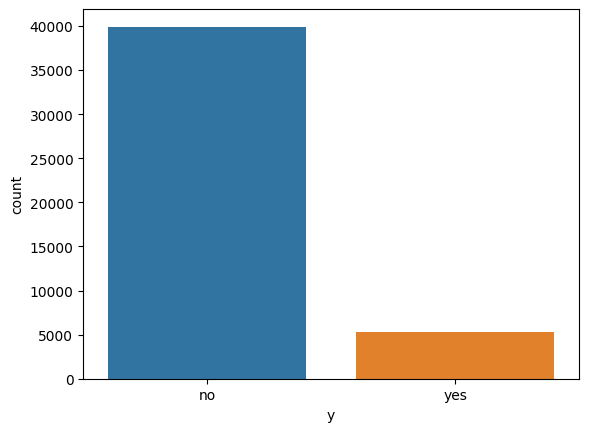

In [12]:
sns.countplot(x='y',data=data)
plt.show()

Text(0, 0.5, 'Frequency of Purchase')

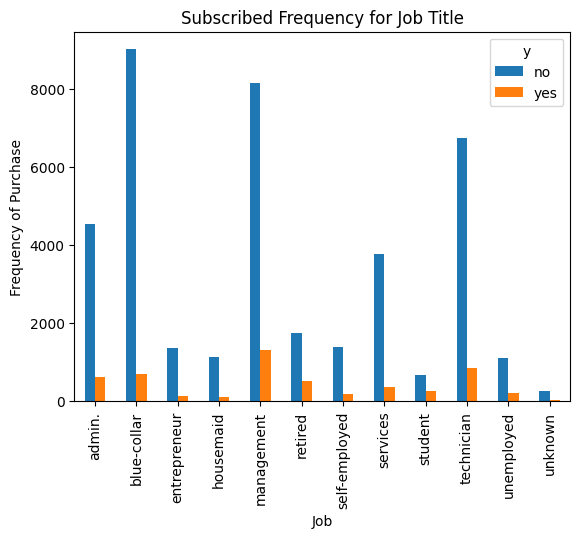

In [16]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Inference: - It is a important feature,as all people of diff age uses different subscription plans

Text(0, 0.5, 'Proportion of Customers')

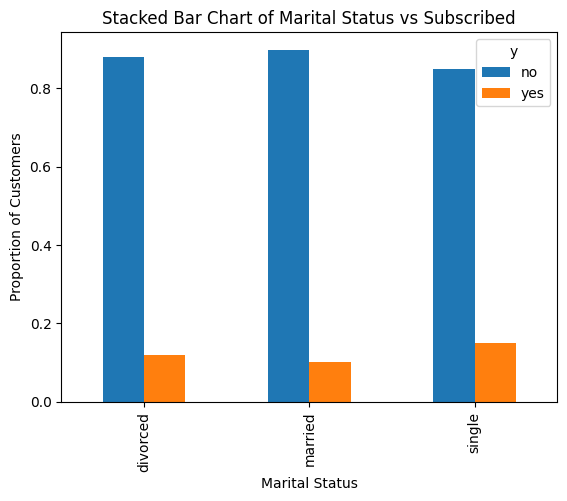

In [20]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Inference:- It is not an important feature,as frequency of remain the same.

Text(0, 0.5, 'Proportion of Customers')

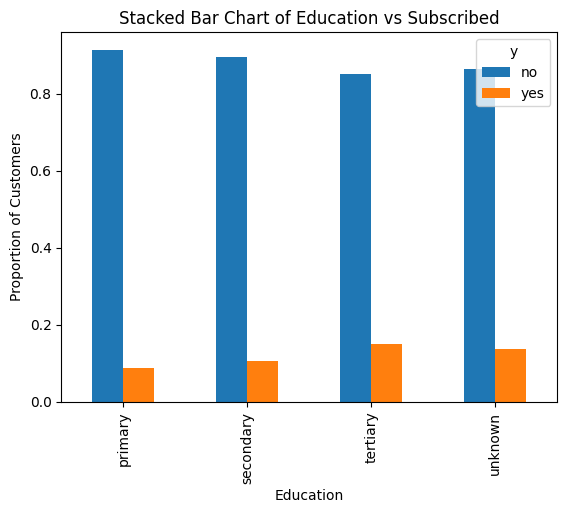

In [21]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Inference:- People of tertiary group/education will get subscription to term deposit 

Text(0, 0.5, 'Frequency of Subsribe')

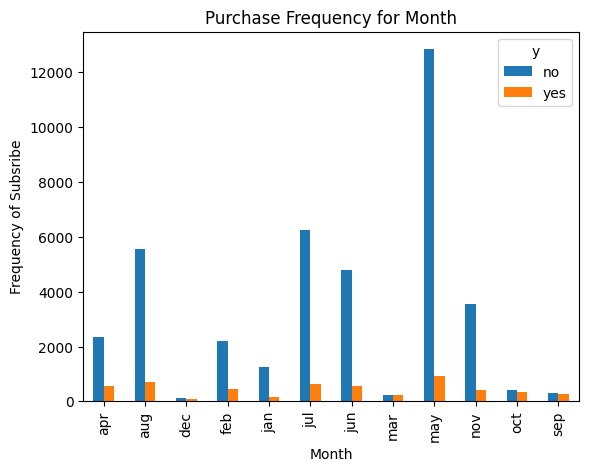

In [22]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

Inference:- In the month of May, people will get term deposit 

Checking for an outliers

<Axes: title={'center': 'age'}, xlabel='y'>

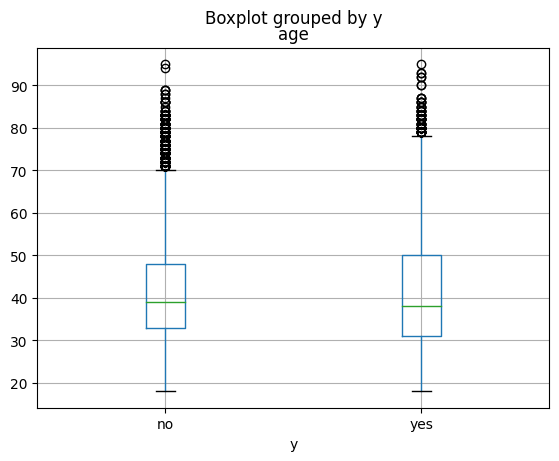

In [24]:
data.boxplot(column='age', by='y')


Text(0, 0.5, 'Frequency of Subscribe')

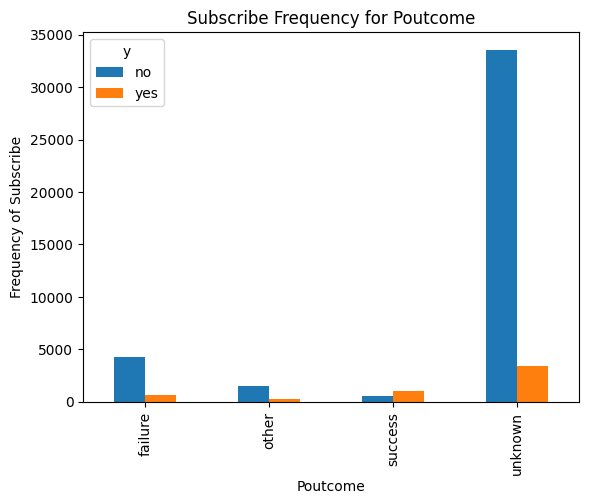

In [26]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')

Rest of the columns aren't that significant, thus dropping insignificant columns.

In [28]:
data.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [29]:
data.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


Creating dummy variables for categorical data

In [32]:
Job=pd.get_dummies(data['job'],drop_first=True)

In [33]:
Contact=pd.get_dummies(data['contact'],drop_first=True)

In [35]:
Default=pd.get_dummies(data['default'],drop_first=True)

In [34]:
Poutcome=pd.get_dummies(data['poutcome'],drop_first=True)

In [39]:
data= pd.concat([data,Job,Poutcome,Contact,Default],axis=1)

In [40]:
data.head()

,job,default,balance,contact,duration,previous,poutcome,y,blue-collar,entrepreneur,...,student,technician,unemployed,unknown,other,success,unknown,telephone,unknown,yes
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,0,0,0,0,0,0,1,0,1,0
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,1,0,0,0,0,1,0,1,0
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,1,...,0,0,0,0,0,0,1,0,1,0
3,blue-collar,no,1506,unknown,92,0,unknown,no,1,0,...,0,0,0,0,0,0,1,0,1,0
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,1,0,0,1,0,1,0


Dropping the categorical column

In [41]:
data.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
data.head()

,balance,duration,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,student,technician,unemployed,unknown,other,success,unknown,telephone,unknown,yes
0,2143,261,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,29,151,0,no,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,2,76,0,no,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1506,92,0,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,198,0,no,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [43]:
data1=data.copy()
data1['y']=data1['y'].map({'no':0,'yes':1})
data1

,balance,duration,previous,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,...,student,technician,unemployed,unknown,other,success,unknown,telephone,unknown,yes
0,2143,261,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,29,151,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,2,76,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1506,92,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,198,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
45207,1729,456,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
45208,5715,1127,3,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
45209,668,508,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


Seperating dependent and independent variables

In [44]:
X = data.drop("y",axis=1)
Y = data["y"]

In [45]:
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

  Prediction using the model

In [46]:
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[0.97520223, 0.02479777],
       [0.98336491, 0.01663509],
       [0.98839678, 0.01160322],
       ...,
       [0.00801538, 0.99198462],
       [0.89814793, 0.10185207],
       [0.92699107, 0.07300893]])

Using confusion matrix and finding the accuracy of model

In [48]:
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm= confusion_matrix(Y,y_pred)
accuracy= accuracy_score(Y,y_pred)
print (cm,accuracy)

[[38961   961]
 [ 3598  1691]] 0.8991617084337883


Accuracy of the model is 90% which is good

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.94     39922
         yes       0.64      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



**ROC CURVE**

In [57]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
y_predict= label_encoder.fit_transform(y_pred) 

y_actual= label_encoder.fit_transform(data1['y']) 

Text(0, 0.5, 'True Positive Rate')

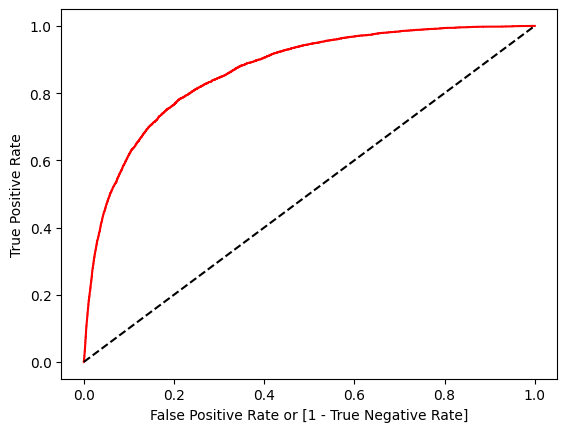

In [58]:
fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])      ##fpr=false positive rate ,tpr=true posistive rate

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [59]:
auc

0.6478241168311862

From the ROC curve, the area under curve(auc) is 64.78%, which means that by an approximation of 65%, it can be used to predict the true positive rate. As the dataset has been a large frequency of negative results, it is biased.


                 precision    recall  f1-score   support

          no       0.92      0.98      0.94     39922
         yes       0.64      0.32      0.43      5289

    accuracy                           0.90     45211


The model gives 90% accurate prediction for the client to subscribe a term deposit